In [1]:
# Author: Nopadon Juneam
# Date: 16 March 2021
# The source code is provided as extra material of Parallel Computing with CUDA Course.

import numpy as np
import pandas as pd

N=470

# load dataset from .csv file
stock_prices = pd.read_csv('./dataset/dataset1257x%s.csv' %N)
stock_prices.columns = ['Asset %s' % x for x in range(1, N+1)]
stock_prices

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 461,Asset 462,Asset 463,Asset 464,Asset 465,Asset 466,Asset 467,Asset 468,Asset 469,Asset 470
0,43.23,106.47,29.56,42.6575,69.280,52.69,24.17,21.030,44.05,13.91,...,68.32,33.55,54.13,37.07,36.66,17.41,13.57,90.35,25.67,15.86
1,43.49,110.81,29.14,43.0900,68.271,52.93,24.17,21.190,44.22,13.86,...,67.13,34.60,54.49,37.34,36.45,17.54,13.51,90.14,25.84,15.92
2,43.38,110.98,29.40,43.0750,67.450,53.22,24.49,21.250,44.62,14.08,...,66.92,34.62,54.56,37.15,36.89,17.17,13.73,90.99,25.86,15.96
3,43.67,111.00,29.48,43.6150,68.110,53.09,24.40,21.230,43.97,14.17,...,67.41,34.22,54.33,37.08,36.83,17.15,14.00,90.01,25.75,15.91
4,44.66,111.33,29.39,43.7575,68.690,53.47,24.46,21.115,43.53,14.10,...,66.80,34.03,54.34,37.22,36.28,16.97,14.37,89.99,25.77,15.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,165.18,182.49,59.84,112.7400,174.730,106.78,53.28,47.650,83.55,34.51,...,120.79,69.82,78.46,35.66,102.24,128.18,73.35,105.17,44.16,26.97
1254,161.82,178.06,59.06,110.7800,173.210,104.63,52.71,46.150,81.06,34.35,...,118.17,64.90,77.73,35.22,99.69,124.53,71.42,103.44,43.48,26.78
1255,156.46,171.88,56.66,107.6500,168.270,99.74,50.43,44.520,77.68,32.80,...,114.63,62.98,75.98,33.69,95.89,121.64,67.98,98.69,42.73,25.61
1256,156.35,173.81,57.10,109.5700,166.000,101.36,50.64,44.910,77.98,33.38,...,115.93,64.16,75.16,34.33,98.71,123.13,69.70,100.33,42.16,25.52


In [2]:
# Compute the assets' returns
returns = (stock_prices/stock_prices.shift(1)).dropna()
returns

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 461,Asset 462,Asset 463,Asset 464,Asset 465,Asset 466,Asset 467,Asset 468,Asset 469,Asset 470
1,1.006014,1.040763,0.985792,1.010139,0.985436,1.004555,1.000000,1.007608,1.003859,0.996405,...,0.982582,1.031297,1.006651,1.007284,0.994272,1.007467,0.995578,0.997676,1.006623,1.003783
2,0.997471,1.001534,1.008922,0.999652,0.987974,1.005479,1.013240,1.002832,1.009046,1.015873,...,0.996872,1.000578,1.001285,0.994912,1.012071,0.978905,1.016284,1.009430,1.000774,1.002513
3,1.006685,1.000180,1.002721,1.012536,1.009785,0.997557,0.996325,0.999059,0.985433,1.006392,...,1.007322,0.988446,0.995784,0.998116,0.998374,0.998835,1.019665,0.989230,0.995746,0.996867
4,1.022670,1.002973,0.996947,1.003267,1.008516,1.007158,1.002459,0.994583,0.989993,0.995060,...,0.990951,0.994448,1.000184,1.003776,0.985067,0.989504,1.026429,0.999778,1.000777,0.994972
5,0.997761,1.011497,1.006465,0.998857,0.988499,1.008229,1.013900,0.998579,1.036067,0.999291,...,1.012275,0.996180,1.011778,1.000000,1.003583,1.036240,1.018093,1.014668,1.012418,1.008844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.980588,1.005898,1.019942,0.989729,1.001318,1.013189,1.001692,0.989821,0.994406,0.991097,...,0.999669,0.984351,0.981363,0.993592,1.010676,1.009609,0.989478,0.980789,0.986816,1.021204
1254,0.979659,0.975725,0.986965,0.982615,0.991301,0.979865,0.989302,0.968520,0.970197,0.995364,...,0.978309,0.929533,0.990696,0.987661,0.975059,0.971524,0.973688,0.983550,0.984601,0.992955
1255,0.966877,0.965293,0.959363,0.971746,0.971480,0.953264,0.956744,0.964680,0.958302,0.954876,...,0.970043,0.970416,0.977486,0.956559,0.961882,0.976793,0.951834,0.954080,0.982751,0.956311
1256,0.999297,1.011229,1.007766,1.017836,0.986510,1.016242,1.004164,1.008760,1.003862,1.017683,...,1.011341,1.018736,0.989208,1.018997,1.029409,1.012249,1.025302,1.016618,0.986660,0.996486


In [3]:
#Compute the assets' expected returns
expected_returns = np.mean(returns)
expected_returns.to_numpy()

array([1.00108727, 1.00053735, 1.00067034, 1.00093641, 1.00078787,
       1.00060454, 1.00068626, 1.00070579, 1.00053659, 1.00086469,
       1.00034365, 1.0006979 , 1.00011437, 1.00044147, 1.00043647,
       1.00048478, 1.00048167, 1.00027942, 1.00046244, 1.00050029,
       1.00040744, 1.0000552 , 1.0011436 , 1.00095685, 1.000198  ,
       0.99989968, 1.00050441, 1.00111178, 1.00067164, 1.0004175 ,
       1.00058394, 1.00062895, 1.00060657, 1.00084092, 1.00015744,
       1.00079577, 1.00040143, 1.00038715, 1.00033797, 1.00017216,
       1.00052542, 1.00097739, 1.00039363, 1.00103075, 0.99996368,
       1.00097531, 1.00027583, 1.00001395, 1.00074717, 0.99951665,
       1.00067422, 0.99964584, 1.00067614, 1.00013718, 1.00048884,
       1.00078845, 1.00041254, 1.00185859, 1.0008006 , 1.00025035,
       1.00008794, 1.00166969, 1.00030998, 1.0002652 , 1.00060549,
       1.00036562, 1.00117422, 1.00061617, 0.99990255, 1.00072796,
       1.00034409, 1.00016246, 1.00034687, 1.00029673, 1.00036

In [4]:
#Compute the assets' return standard deviations
return_stds = np.std(returns)
return_stds.to_numpy()

array([0.01125611, 0.0177259 , 0.01642073, 0.01912731, 0.01341307,
       0.01329982, 0.01401459, 0.01394693, 0.01429432, 0.01819903,
       0.01617887, 0.01918944, 0.01642378, 0.01073881, 0.01281562,
       0.00934506, 0.01307728, 0.01148428, 0.0120566 , 0.02151982,
       0.01256322, 0.01077189, 0.01009969, 0.01926752, 0.01311802,
       0.01463   , 0.01232125, 0.01103383, 0.01582767, 0.0098936 ,
       0.01522626, 0.01143007, 0.02188484, 0.01698814, 0.01120256,
       0.02287298, 0.01457056, 0.02326445, 0.02694787, 0.01461095,
       0.01641081, 0.0158999 , 0.00841747, 0.01420725, 0.01731088,
       0.01986883, 0.0098787 , 0.01224588, 0.01293399, 0.02010852,
       0.01521177, 0.0199157 , 0.01234614, 0.0174588 , 0.01210319,
       0.02160406, 0.01644855, 0.03777539, 0.01311785, 0.01032556,
       0.01003302, 0.02009472, 0.01067919, 0.01635836, 0.01331699,
       0.024943  , 0.01267046, 0.00879704, 0.01292972, 0.01766332,
       0.01141653, 0.0117939 , 0.01507287, 0.01485977, 0.01428

In [5]:
#Compute the assets' return variances
return_variances = np.var(returns)
return_variances.to_numpy()

array([1.26699950e-04, 3.14207634e-04, 2.69640253e-04, 3.65853946e-04,
       1.79910535e-04, 1.76885239e-04, 1.96408782e-04, 1.94516892e-04,
       2.04327472e-04, 3.31204740e-04, 2.61755763e-04, 3.68234741e-04,
       2.69740518e-04, 1.15322000e-04, 1.64240223e-04, 8.73301903e-05,
       1.71015244e-04, 1.31888612e-04, 1.45361620e-04, 4.63102722e-04,
       1.57834433e-04, 1.16033672e-04, 1.02003645e-04, 3.71237393e-04,
       1.72082563e-04, 2.14037018e-04, 1.51813258e-04, 1.21745342e-04,
       2.50515283e-04, 9.78833727e-05, 2.31839011e-04, 1.30646433e-04,
       4.78946342e-04, 2.88596864e-04, 1.25497400e-04, 5.23173189e-04,
       2.12301310e-04, 5.41234418e-04, 7.26187743e-04, 2.13479913e-04,
       2.69314643e-04, 2.52806913e-04, 7.08537804e-05, 2.01845962e-04,
       2.99666530e-04, 3.94770518e-04, 9.75887096e-05, 1.49961652e-04,
       1.67288039e-04, 4.04352766e-04, 2.31397997e-04, 3.96634930e-04,
       1.52427248e-04, 3.04809746e-04, 1.46487250e-04, 4.66735524e-04,
      

In [6]:
#Compute the assets' return correlation coefficients
return_corrcoef = np.corrcoef(returns, rowvar=False)
return_corrcoef


array([[1.        , 0.32996966, 0.44328623, ..., 0.32001266, 0.2704245 ,
        0.33674991],
       [0.32996966, 1.        , 0.36913018, ..., 0.25133546, 0.20057   ,
        0.3368168 ],
       [0.44328623, 0.36913018, 1.        , ..., 0.26026418, 0.15112185,
        0.33411483],
       ...,
       [0.32001266, 0.25133546, 0.26026418, ..., 1.        , 0.41453288,
        0.43960484],
       [0.2704245 , 0.20057   , 0.15112185, ..., 0.41453288, 1.        ,
        0.54260268],
       [0.33674991, 0.3368168 , 0.33411483, ..., 0.43960484, 0.54260268,
        1.        ]])

In [7]:
#Compute the assets' return covariance
return_covariances = np.cov(returns, rowvar=False)
return_covariances

array([[1.26800825e-04, 6.58895038e-05, 8.19993607e-05, ...,
        3.72020789e-05, 3.12219264e-05, 4.65223306e-05],
       [6.58895038e-05, 3.14457799e-04, 1.07529078e-04, ...,
        4.60123011e-05, 3.64669789e-05, 7.32770306e-05],
       [8.19993607e-05, 1.07529078e-04, 2.69854935e-04, ...,
        4.41386042e-05, 2.54533577e-05, 6.73370155e-05],
       ...,
       [3.72020789e-05, 4.60123011e-05, 4.41386042e-05, ...,
        1.06580564e-04, 4.38783833e-05, 5.56793810e-05],
       [3.12219264e-05, 3.64669789e-05, 2.54533577e-05, ...,
        4.38783833e-05, 1.05124816e-04, 6.82539020e-05],
       [4.65223306e-05, 7.32770306e-05, 6.73370155e-05, ...,
        5.56793810e-05, 6.82539020e-05, 1.50517105e-04]])

In [8]:
#Compute portfolio's expected return and variance
portfolio = np.ones(N) * (1/N)
portfolio_expected_return = np.dot(portfolio, expected_returns)
portfolio_variance = np.dot(np.dot(portfolio.T, return_covariances), portfolio)
portfolio_expected_return, portfolio_variance

(1.0005500676007004, 6.384339151273799e-05)

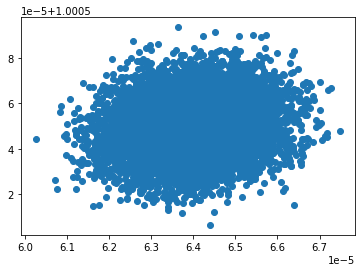

In [9]:
# Simulating efficient frontier
import matplotlib.pyplot as plt
samples = 10000
x = []
y = []
for i in range(0, samples):
    rand = np.random.rand(N)
    portfolio = rand/np.sum(rand)
    y.append(np.dot(portfolio, expected_returns))
    x.append(np.dot(np.dot(portfolio.T, return_covariances), portfolio))

plt.scatter(x, y)
plt.show()